In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("datasets/ambient_temperature_system_failure.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"])
# Change to °C
df["value"] = (df["value"] - 32) * 5 / 9

In [3]:
glass = np.load("./datasets/14_glass.npz")

In [4]:
glass["X"].shape, glass["y"].shape

((214, 7), (214,))

In [6]:
gdf = pd.DataFrame(glass["X"])
gdf["target"] = glass["y"]
gdf.columns = gdf.columns.astype(str)

In [7]:
np.unique(gdf["target"], return_counts=True)

(array([0, 1], dtype=int32), array([205,   9]))

In [8]:
gdf.head()

,0,1,2,3,4,5,6,target
0,0.467651,0.321584,0.768880,0.246630,0.838799,0.099737,0.298340,0
1,0.496412,0.220491,0.776032,0.316598,0.919973,0.089145,0.279479,0
2,0.519133,0.404464,0.768012,0.334978,0.801622,0.092369,0.271238,0
3,0.199650,0.547373,0.374284,0.362223,0.817017,0.000000,0.177913,1
4,0.847261,0.286361,0.000000,0.217792,0.000000,0.019135,1.000000,0


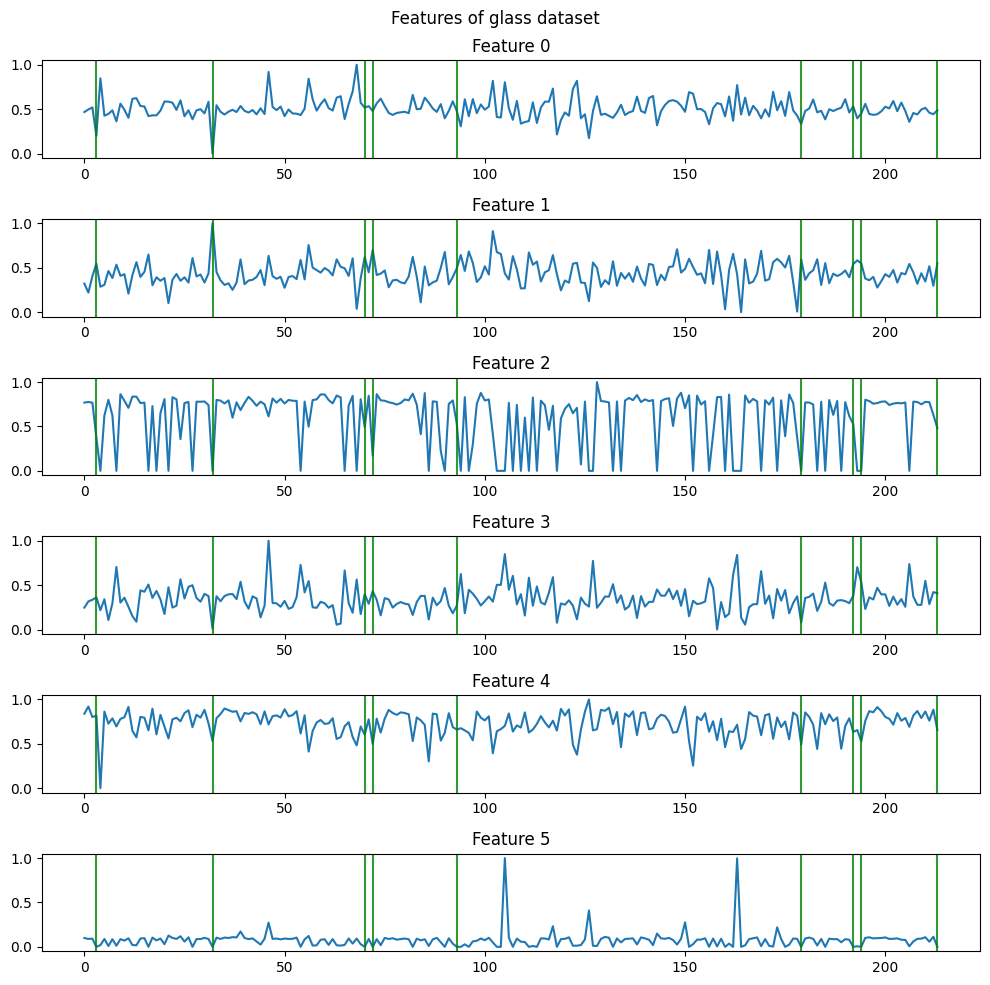

In [9]:
# 6 subplots
fig, axs = plt.subplots(6, 1, figsize=(10, 10))

for i, ax in enumerate(axs.flatten()):
    ax.plot(gdf[f"{i}"])
    ax.set_title(f"Feature {i}")
    # Add vertical line when target is 1
    for j in gdf[gdf["target"] == 1].index:
        ax.axvline(j, color="green", alpha=0.8)

plt.suptitle("Features of glass dataset")
plt.tight_layout()
plt.show()

<Axes: xlabel='timestamp'>

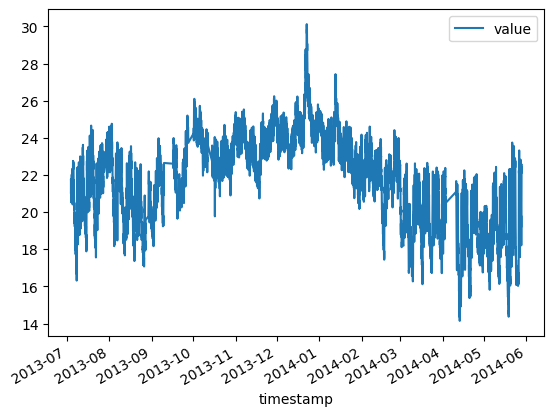

In [10]:
df.plot(x="timestamp", y="value")

In [30]:
thyro = np.load("./datasets/2_annthyroid.npz")
X, y = thyro["X"], thyro["y"]

In [31]:
thyrodf = pd.DataFrame(X)
thyrodf["target"] = y
thyrodf.columns = thyrodf.columns.astype(str)

In [32]:
thyrodf.head()

,0,1,2,3,4,5,target
0,0.73,0.00060,0.015,0.120,0.082,0.146,0
1,0.24,0.00025,0.030,0.143,0.133,0.108,0
2,0.47,0.00190,0.024,0.102,0.131,0.078,0
3,0.64,0.00090,0.017,0.077,0.090,0.085,0
4,0.23,0.00025,0.026,0.139,0.090,0.153,0


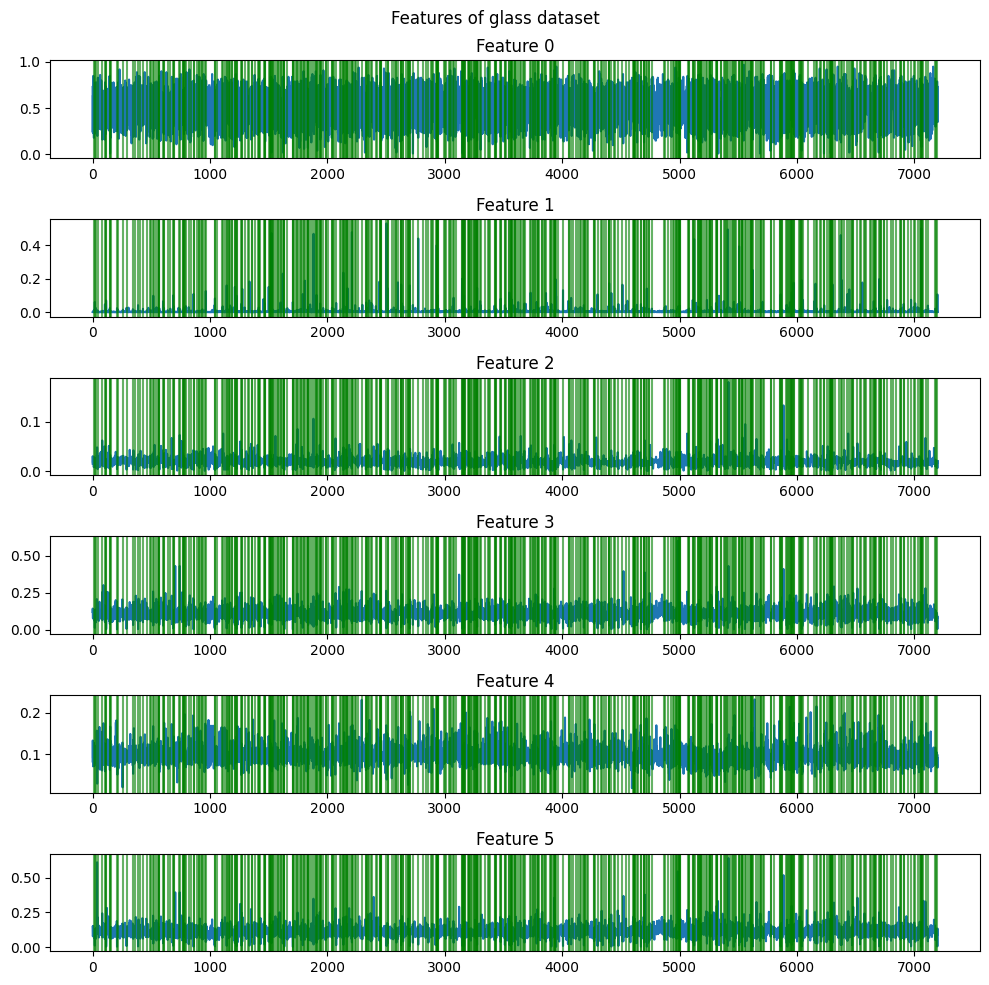

In [33]:
# 6 subplots
fig, axs = plt.subplots(6, 1, figsize=(10, 10))

for i, ax in enumerate(axs.flatten()):
    ax.plot(thyrodf[f"{i}"])
    ax.set_title(f"Feature {i}")
    # Add vertical line when target is 1
    for j in thyrodf[thyrodf["target"] == 1].index:
        ax.axvline(j, color="green", alpha=0.6)

plt.suptitle("Features of glass dataset")
plt.tight_layout()
plt.show()

# SKAB Anomaly 1

In [50]:
skab1 = pd.read_csv("./datasets/skab_anomaly_1.csv", sep=";")
skab1["datetime"] = pd.to_datetime(skab1["datetime"])
skab1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745 entries, 0 to 744
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   datetime             745 non-null    datetime64[ns]
 1   Accelerometer1RMS    745 non-null    float64       
 2   Accelerometer2RMS    745 non-null    float64       
 3   Current              745 non-null    float64       
 4   Pressure             745 non-null    float64       
 5   Temperature          745 non-null    float64       
 6   Thermocouple         745 non-null    float64       
 7   Voltage              745 non-null    float64       
 8   Volume Flow RateRMS  745 non-null    float64       
 9   anomaly              745 non-null    float64       
 10  changepoint          745 non-null    float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 64.2 KB


In [64]:
skab1.head()

,datetime,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
0,2020-03-01 15:44:06,0.082065,0.133521,1.27794,0.054711,92.2562,22.2577,209.639,76.0197,0.0,0.0
1,2020-03-01 15:44:07,0.082724,0.132378,1.12118,-0.273216,92.0144,22.2577,221.250,76.9806,0.0,0.0
2,2020-03-01 15:44:08,0.081648,0.139038,1.93242,0.054711,92.2413,22.2748,236.615,76.0197,0.0,0.0
3,2020-03-01 15:44:09,0.083335,0.132742,1.25962,-0.273216,92.2438,22.2657,230.375,77.0000,0.0,0.0
4,2020-03-01 15:44:10,0.082272,0.133171,1.59773,0.054711,92.3611,22.2591,249.701,77.0000,0.0,0.0


In [56]:
print(skab1.anomaly.value_counts())
print(skab1.changepoint.value_counts())

anomaly
0.0    557
1.0    188
Name: count, dtype: int64
changepoint
0.0    743
1.0      2
Name: count, dtype: int64


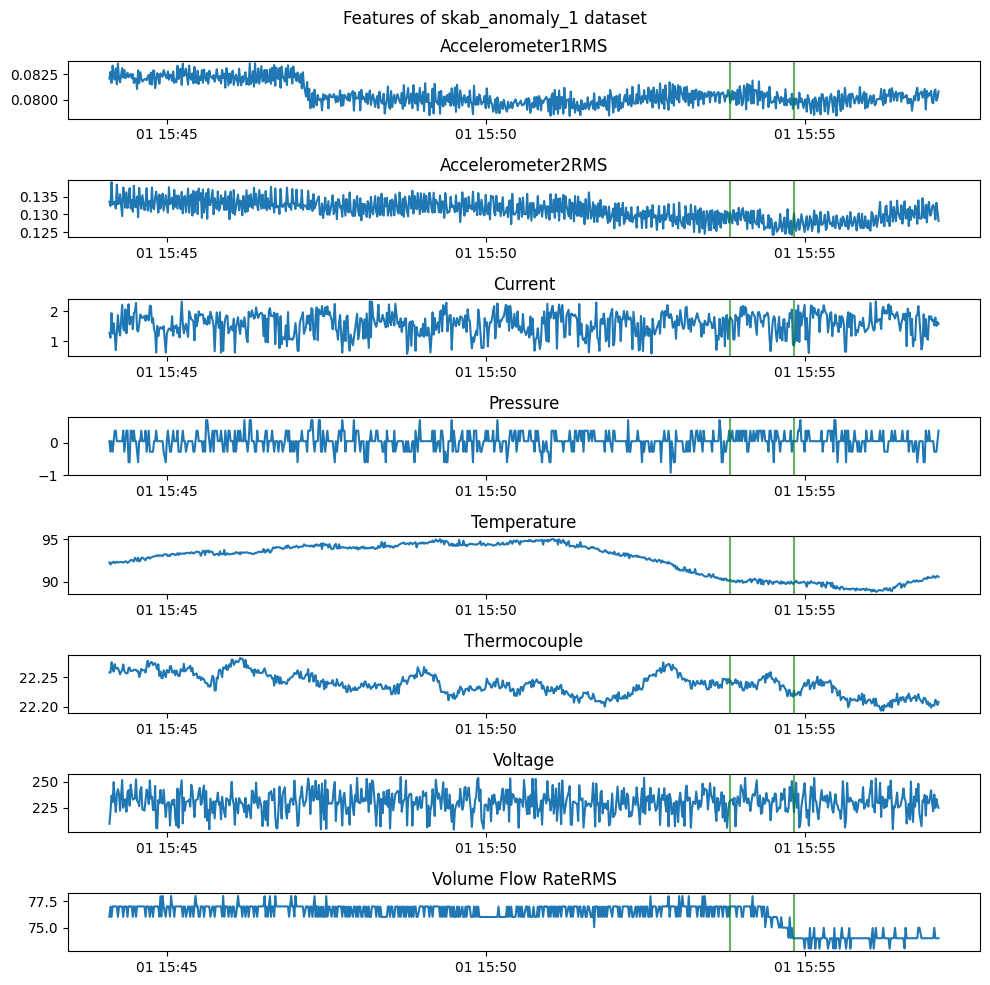

In [60]:
# Select all columns except datetime and target
cols = skab1.columns.difference(["datetime", "anomaly", "changepoint"])

# 8 subplots
fig, axs = plt.subplots(len(cols), 1, figsize=(10, 10))

for i, ax in enumerate(axs.flatten()):
    ax.plot(skab1["datetime"], skab1[cols[i]])
    ax.set_title(f"{cols[i]}")
    # Add vertical line when target is 1
    for j in skab1[skab1["changepoint"] == 1].index:
        ax.axvline(skab1["datetime"][j], color="green", alpha=0.6)

plt.suptitle("Features of skab_anomaly_1 dataset")
plt.tight_layout()
plt.show()

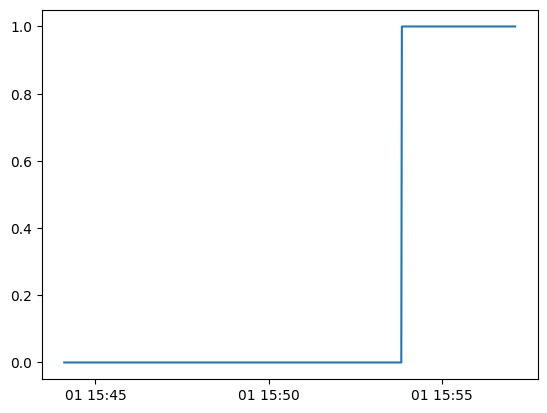

In [61]:
plt.plot(skab1["datetime"], skab1["anomaly"])

# Isolation Forest

In [34]:
# Anomaly detection with isolation forest
from sklearn.ensemble import IsolationForest

# Train the model
model = IsolationForest(contamination=5e-2)
model.fit(df["value"].values.reshape(-1, 1))

# Predict anomalies
df["anomaly"] = model.predict(df["value"].values.reshape(-1, 1))
df["anomaly"] = df["anomaly"].map({1: 0, -1: 1})

In [15]:
t = model.predict(df["value"].values.reshape(-1, 1))

In [18]:
np.unique(t, return_counts=True)

(array([-1,  1]), array([ 360, 6907]))

In [11]:
model = IsolationForest(contamination=5e-2)
model.fit(glass["X"])

IsolationForest(contamination=0.05)

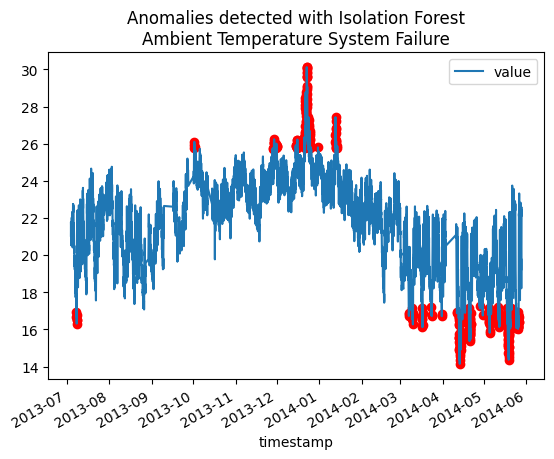

In [31]:
# Plot anomalies
df.plot(
    x="timestamp",
    y="value",
    title="Anomalies detected with Isolation Forest\nAmbient Temperature System Failure",
)
plt.scatter(
    df[df["anomaly"] == 1]["timestamp"], df[df["anomaly"] == 1]["value"], color="red"
)

plt.show()

In [67]:
# Using Isolation Forest on multivariate data

# Train the model
model = IsolationForest(contamination="auto")
model.fit(gdf.drop(columns="target"))

IsolationForest()

In [68]:
# Predict anomalies
gdf["anomaly_if"] = model.predict(gdf.drop("target", axis=1))
gdf["anomaly_if"] = gdf["anomaly_if"].map({1: 0, -1: 1})

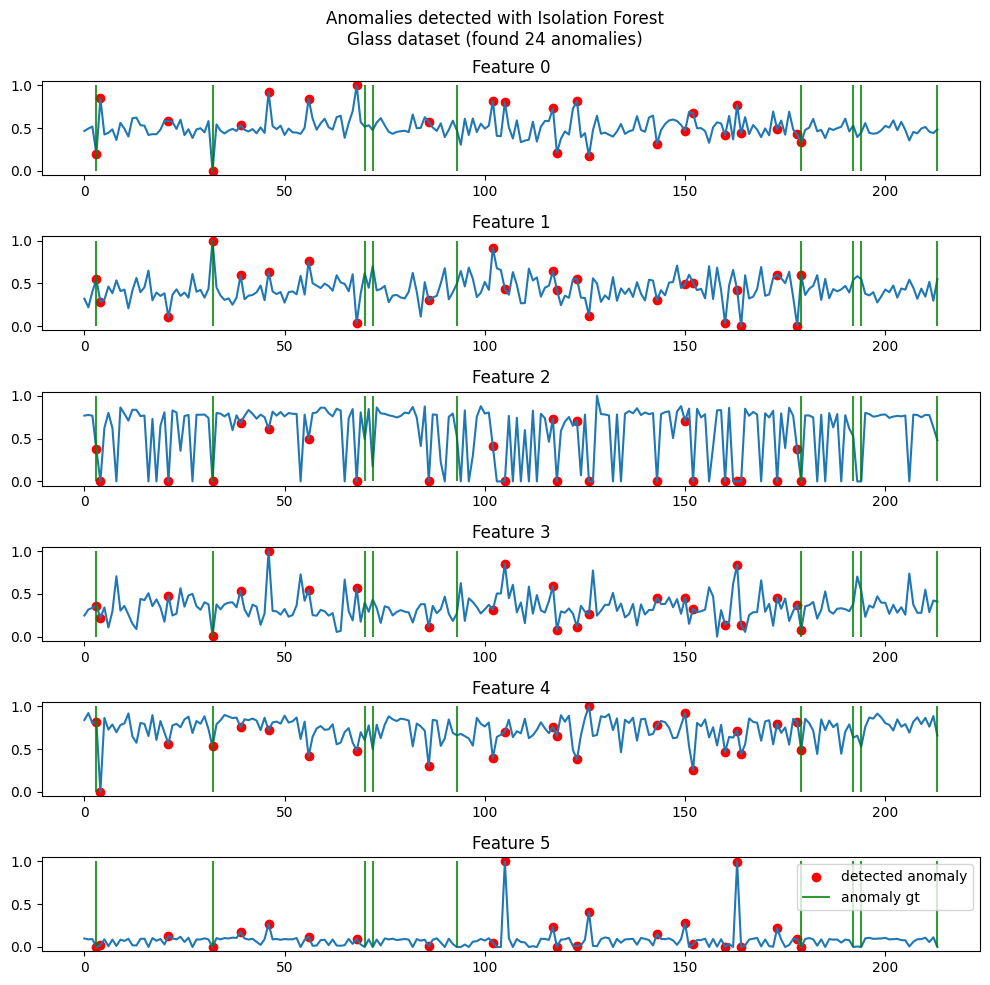

In [190]:
# Plot anomalies
fig, axs = plt.subplots(6, 1, figsize=(10, 10))

for i, ax in enumerate(axs.flatten()):
    ax.plot(gdf[f"{i}"])
    ax.set_title(f"Feature {i}")
    # add scatter plot for anomalies
    ax.scatter(
        gdf[gdf["anomaly_if"] == 1].index,
        gdf[gdf["anomaly_if"] == 1][f"{i}"],
        color="red",
        label="detected anomaly",
    )

    ax.vlines(
        gdf[gdf["target"] == 1].index,
        gdf[f"{i}"].min(),
        gdf[f"{i}"].max(),
        color="green",
        alpha=0.8,
        label="anomaly gt",
    )


plt.suptitle(
    f"Anomalies detected with Isolation Forest\nGlass dataset (found {gdf['anomaly_if'].sum()} anomalies)"
)
plt.tight_layout()
plt.legend(loc="upper right")
plt.show()

In [43]:
model = IsolationForest(contamination=5e-3)

model.fit(thyrodf.drop(columns="target"))

thyrodf["anomaly_if"] = model.predict(thyrodf.drop("target", axis=1))
thyrodf["anomaly_if"] = thyrodf["anomaly_if"].map({1: 0, -1: 1})

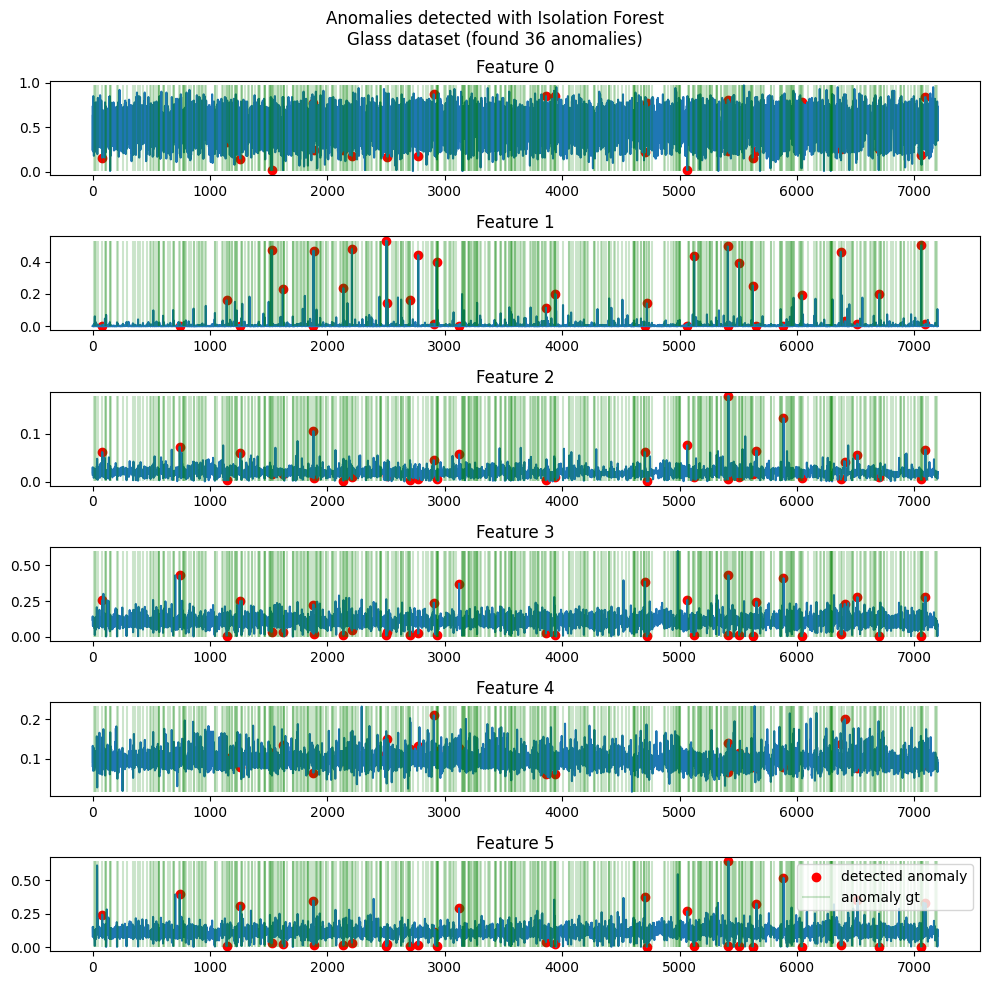

In [44]:
# Plot anomalies
fig, axs = plt.subplots(6, 1, figsize=(10, 10))

for i, ax in enumerate(axs.flatten()):
    ax.plot(thyrodf[f"{i}"])
    ax.set_title(f"Feature {i}")
    # add scatter plot for anomalies
    ax.scatter(
        thyrodf[thyrodf["anomaly_if"] == 1].index,
        thyrodf[thyrodf["anomaly_if"] == 1][f"{i}"],
        color="red",
        label="detected anomaly",
    )

    ax.vlines(
        thyrodf[thyrodf["target"] == 1].index,
        thyrodf[f"{i}"].min(),
        thyrodf[f"{i}"].max(),
        color="green",
        alpha=0.2,
        label="anomaly gt",
    )


plt.suptitle(
    f"Anomalies detected with Isolation Forest\nGlass dataset (found {thyrodf['anomaly_if'].sum()} anomalies)"
)
plt.tight_layout()
plt.legend(loc="upper right")
plt.show()

# LOF

In [71]:
# Using Local Outlier Factor
from sklearn.neighbors import LocalOutlierFactor

# Train the model
model = LocalOutlierFactor(novelty=True, n_neighbors=250)
model.fit(df["value"].values.reshape(-1, 1))

LocalOutlierFactor(n_neighbors=250, novelty=True)

In [72]:
# Predict anomalies
df["anomaly_lof"] = model.predict(df["value"].values.reshape(-1, 1))
df["anomaly_lof"] = df["anomaly_lof"].map({1: 0, -1: 1})

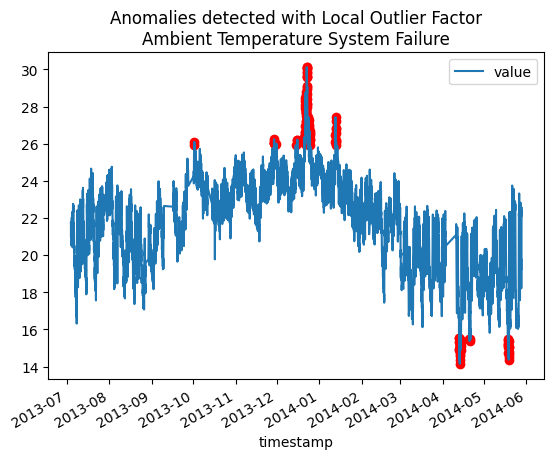

In [73]:
# Plot anomalies
df.plot(
    x="timestamp",
    y="value",
    title="Anomalies detected with Local Outlier Factor\nAmbient Temperature System Failure",
)
plt.scatter(
    df[df["anomaly_lof"] == 1]["timestamp"],
    df[df["anomaly_lof"] == 1]["value"],
    color="red",
)
plt.show()

In [127]:
model = LocalOutlierFactor(novelty=True, contamination=0.5, n_neighbors=2)
model.fit(gdf.drop(columns="target"))

# Predict anomalies
gdf["anomaly_lof"] = model.predict(gdf.drop("target", axis=1))
gdf["anomaly_lof"] = gdf["anomaly_lof"].map({1: 0, -1: 1})

/storage/store/work/jyehya/anaconda/envs/benchopt/lib/python3.12/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


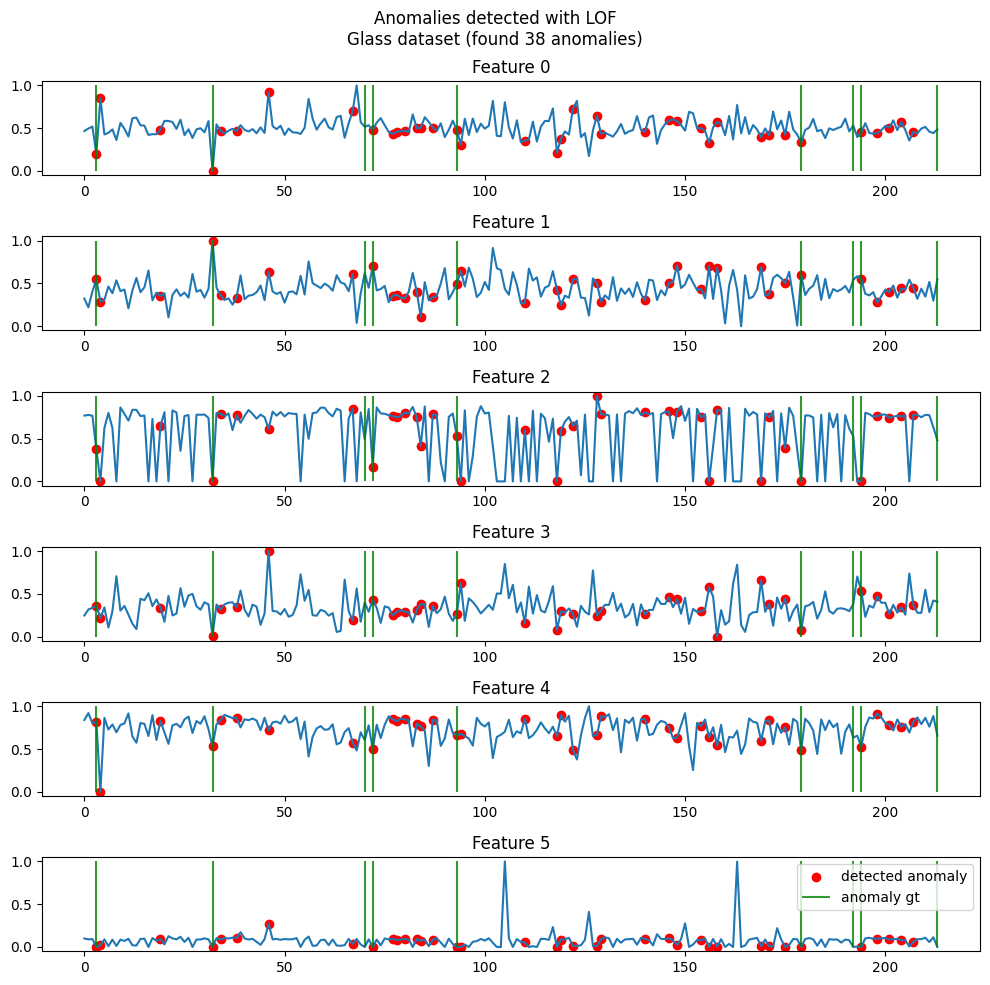

In [189]:
# Plot anomalies
fig, axs = plt.subplots(6, 1, figsize=(10, 10))

for i, ax in enumerate(axs.flatten()):
    ax.plot(gdf[f"{i}"])
    ax.set_title(f"Feature {i}")
    # add scatter plot for anomalies
    ax.scatter(
        gdf[gdf["anomaly_lof"] == 1].index,
        gdf[gdf["anomaly_lof"] == 1][f"{i}"],
        color="red",
        label="detected anomaly",
    )

    ax.vlines(
        gdf[gdf["target"] == 1].index,
        gdf[f"{i}"].min(),
        gdf[f"{i}"].max(),
        color="green",
        alpha=0.8,
        label="anomaly gt",
    )


plt.suptitle(
    f"Anomalies detected with LOF\nGlass dataset (found {gdf['anomaly_lof'].sum()} anomalies)"
)
plt.tight_layout()
plt.legend(loc="upper right")
plt.show()

# ABOD 1

In [135]:
from pyod.models.abod import ABOD  # type: ignore

# Train the model
model = ABOD(contamination=0.1, n_neighbors=30)
model.fit(df["value"].values.reshape(-1, 1))

ABOD(contamination=0.1, method='fast', n_neighbors=30)

In [136]:
# Predict anomalies
df["anomaly_abod"] = model.predict(df["value"].values.reshape(-1, 1))

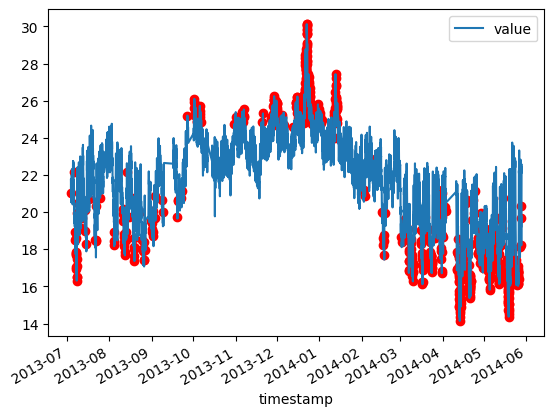

In [137]:
# Plot anomalies
df.plot(x="timestamp", y="value")
plt.scatter(
    df[df["anomaly_abod"] == 1]["timestamp"],
    df[df["anomaly_abod"] == 1]["value"],
    color="red",
)
plt.show()

In [138]:
df.head()

,timestamp,value,anomaly,anomaly_lof,anomaly_abod
0,2013-07-04 00:00:00,21.044908,0,NaN,1
1,2013-07-04 01:00:00,21.789015,0,NaN,0
2,2013-07-04 02:00:00,21.598781,0,NaN,0
3,2013-07-04 03:00:00,20.533000,0,NaN,0
4,2013-07-04 04:00:00,20.713084,0,NaN,0


In [192]:
model = ABOD(contamination=0.1, n_neighbors=30)
model.fit(gdf.drop(columns="target"))

ABOD(contamination=0.1, method='fast', n_neighbors=30)

In [193]:
gdf["anomaly_abod"] = model.predict(gdf.drop(columns="target"))

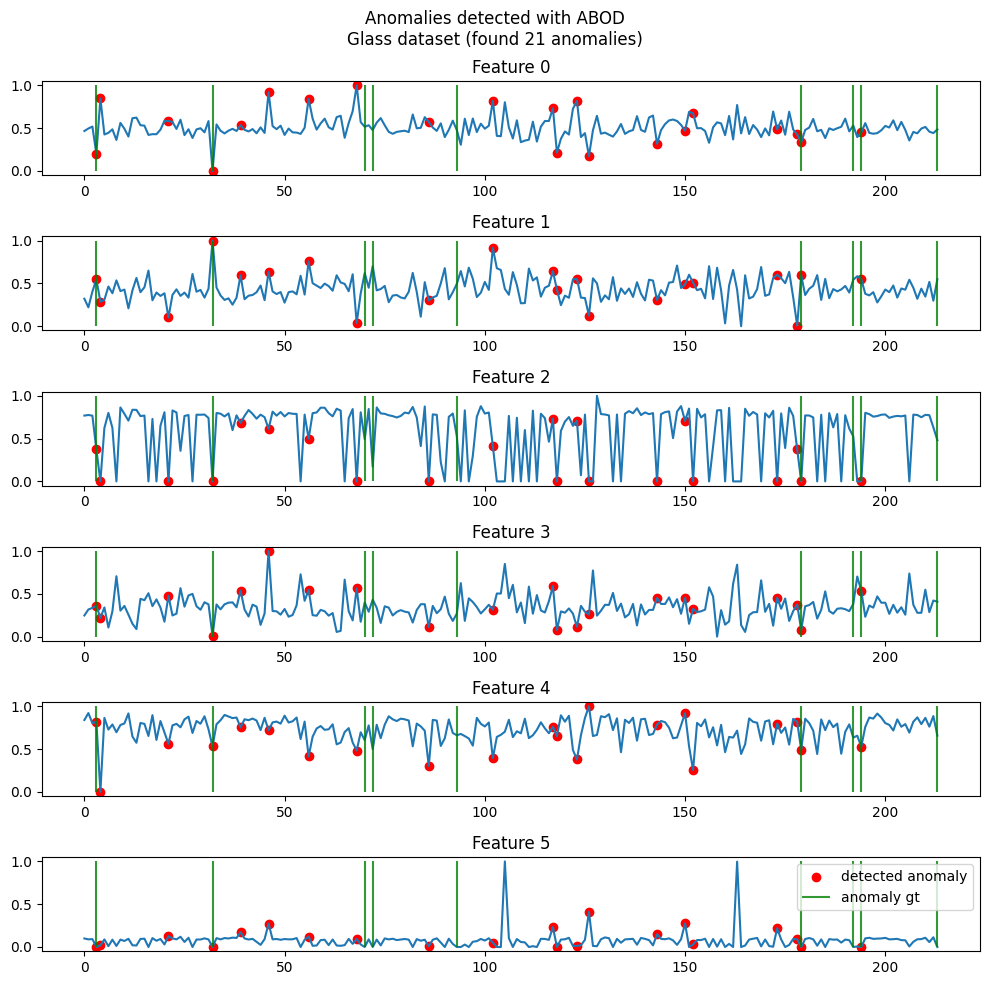

In [196]:
# Plot anomalies
fig, axs = plt.subplots(6, 1, figsize=(10, 10))

for i, ax in enumerate(axs.flatten()):
    ax.plot(gdf[f"{i}"])
    ax.set_title(f"Feature {i}")
    # add scatter plot for anomalies
    ax.scatter(
        gdf[gdf["anomaly_abod"] == 1].index,
        gdf[gdf["anomaly_abod"] == 1][f"{i}"],
        color="red",
        label="detected anomaly",
    )

    ax.vlines(
        gdf[gdf["target"] == 1].index,
        gdf[f"{i}"].min(),
        gdf[f"{i}"].max(),
        color="green",
        alpha=0.8,
        label="anomaly gt",
    )


plt.suptitle(
    f"Anomalies detected with ABOD\nGlass dataset (found {gdf['anomaly_abod'].sum()} anomalies)"
)
plt.tight_layout()
plt.legend(loc="upper right")
plt.show()

# Windowing 

In [141]:
# Creating another dataset with 2 months windows of data
df["month"] = df["timestamp"].dt.month

In [142]:
df.head()

,timestamp,value,anomaly,anomaly_lof,anomaly_abod,month
0,2013-07-04 00:00:00,21.044908,0,NaN,1,7
1,2013-07-04 01:00:00,21.789015,0,NaN,0,7
2,2013-07-04 02:00:00,21.598781,0,NaN,0,7
3,2013-07-04 03:00:00,20.533000,0,NaN,0,7
4,2013-07-04 04:00:00,20.713084,0,NaN,0,7


In [143]:
df["window_index"] = np.nan

In [144]:
df.loc[0, "window_index"] = 0

In [145]:
df.head()

,timestamp,value,anomaly,anomaly_lof,anomaly_abod,month,window_index
0,2013-07-04 00:00:00,21.044908,0,NaN,1,7,0.0
1,2013-07-04 01:00:00,21.789015,0,NaN,0,7,NaN
2,2013-07-04 02:00:00,21.598781,0,NaN,0,7,NaN
3,2013-07-04 03:00:00,20.533000,0,NaN,0,7,NaN
4,2013-07-04 04:00:00,20.713084,0,NaN,0,7,NaN


In [146]:
im = 7
wi = 0
for i in range(len(df)):
    if df.loc[i, "month"] != im:
        wi += 1
        im = df.loc[i, "month"]
    df.loc[i, "window_index"] = wi
df["window_index"] = np.floor(df["window_index"] // 2)
df["window_index"] = df["window_index"].astype("int32")

In [147]:
df.head(100)

,timestamp,value,anomaly,anomaly_lof,anomaly_abod,month,window_index
0,2013-07-04 00:00:00,21.044908,0,NaN,1,7,0
1,2013-07-04 01:00:00,21.789015,0,NaN,0,7,0
2,2013-07-04 02:00:00,21.598781,0,NaN,0,7,0
3,2013-07-04 03:00:00,20.533000,0,NaN,0,7,0
4,2013-07-04 04:00:00,20.713084,0,NaN,0,7,0
...,...,...,...,...,...,...,...
95,2013-07-07 23:00:00,17.914796,0,NaN,0,7,0
96,2013-07-08 00:00:00,16.933769,1,NaN,1,7,0
97,2013-07-08 01:00:00,16.683641,1,NaN,0,7,0
98,2013-07-08 02:00:00,17.450867,0,NaN,1,7,0


We now have 5 windows of 2 months each. We can use these windows to evaluate the performance of our model in a train/test setting.

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     7267 non-null   datetime64[ns]
 1   value         7267 non-null   float64       
 2   anomaly       7267 non-null   int64         
 3   anomaly_lof   0 non-null      float64       
 4   anomaly_abod  7267 non-null   int64         
 5   month         7267 non-null   int32         
 6   window_index  7267 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(2)
memory usage: 340.8 KB


<Axes: xlabel='timestamp'>

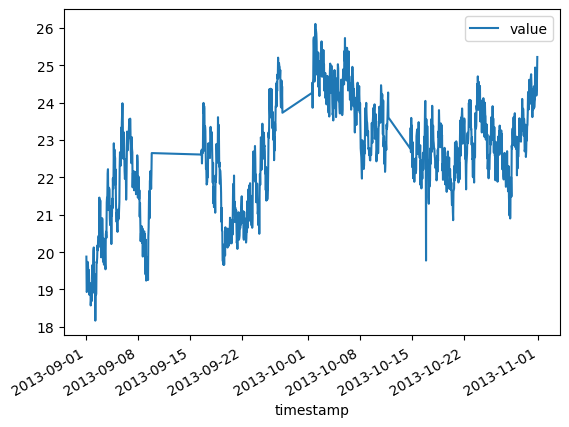

In [149]:
win1 = df[df["window_index"] == 1].reset_index(drop=True)
win1.plot(x="timestamp", y="value")

# ABOD W

Retrying to use ABOD on a single window with more neighbours to see if it is able to detect the outliers.

In [96]:
model = ABOD(contamination=0.1)
model.fit(win1["value"].values.reshape(-1, 1))

ABOD(contamination=0.1, method='fast', n_neighbors=5)

In [97]:
win1.head()

,timestamp,value,anomaly,anomaly_lof,anomaly_abod,month,window_index
0,2013-09-01 00:00:00,19.878751,0,0,0,9,1
1,2013-09-01 01:00:00,18.931193,0,0,0,9,1
2,2013-09-01 02:00:00,18.950063,0,0,1,9,1
3,2013-09-01 03:00:00,19.505433,0,0,0,9,1
4,2013-09-01 04:00:00,19.738619,0,0,0,9,1


In [98]:
win1["anomaly_abod"] = model.predict(win1["value"].values.reshape(-1, 1))

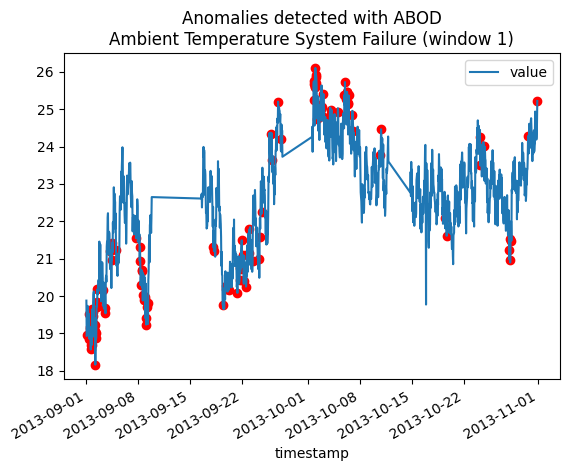

In [126]:
win1.plot(
    x="timestamp",
    y="value",
    title="Anomalies detected with ABOD\nAmbient Temperature System Failure (window 1)",
)
plt.scatter(
    win1[win1["anomaly_abod"] == 1]["timestamp"],
    win1[win1["anomaly_abod"] == 1]["value"],
    color="red",
)

# CBLOF

In [ ]:
from pyod.models.cblof import CBLOF

model = CBLOF(
    alpha=0.9,
    beta=5,
    check_estimator=False,
    clustering_estimator=None,
    contamination=0.03,
    n_clusters=8,
    n_jobs=None,
    random_state=None,
    use_weights=False,
)

model.fit(win1["value"].values.reshape(-1, 1))

In [151]:
win1["anomaly_cblof"] = model.predict(win1["value"].values.reshape(-1, 1))

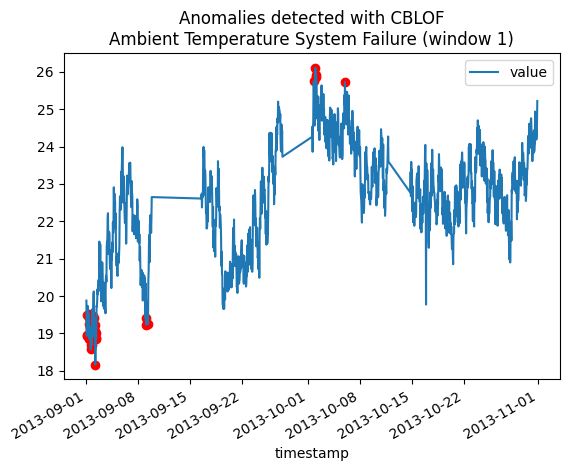

In [152]:
win1.plot(
    x="timestamp",
    y="value",
    title="Anomalies detected with CBLOF\nAmbient Temperature System Failure (window 1)",
)
plt.scatter(
    win1[win1["anomaly_cblof"] == 1]["timestamp"],
    win1[win1["anomaly_cblof"] == 1]["value"],
    color="red",
)
plt.show()

In [174]:
model = CBLOF(
    alpha=5e-5,
    beta=17,
    check_estimator=False,
    clustering_estimator=None,
    contamination=5e-2,
    n_clusters=8,
    n_jobs=None,
    random_state=None,
    use_weights=False,
)

model.fit(gdf.drop(columns="target"))

/storage/store/work/jyehya/anaconda/envs/benchopt/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


CBLOF(alpha=5e-05, beta=17, check_estimator=False, clustering_estimator=None,
   contamination=0.05, n_clusters=8, n_jobs=None, random_state=None,
   use_weights=False)

In [175]:
gdf["anomaly_cblof"] = model.predict(gdf.drop("target", axis=1))

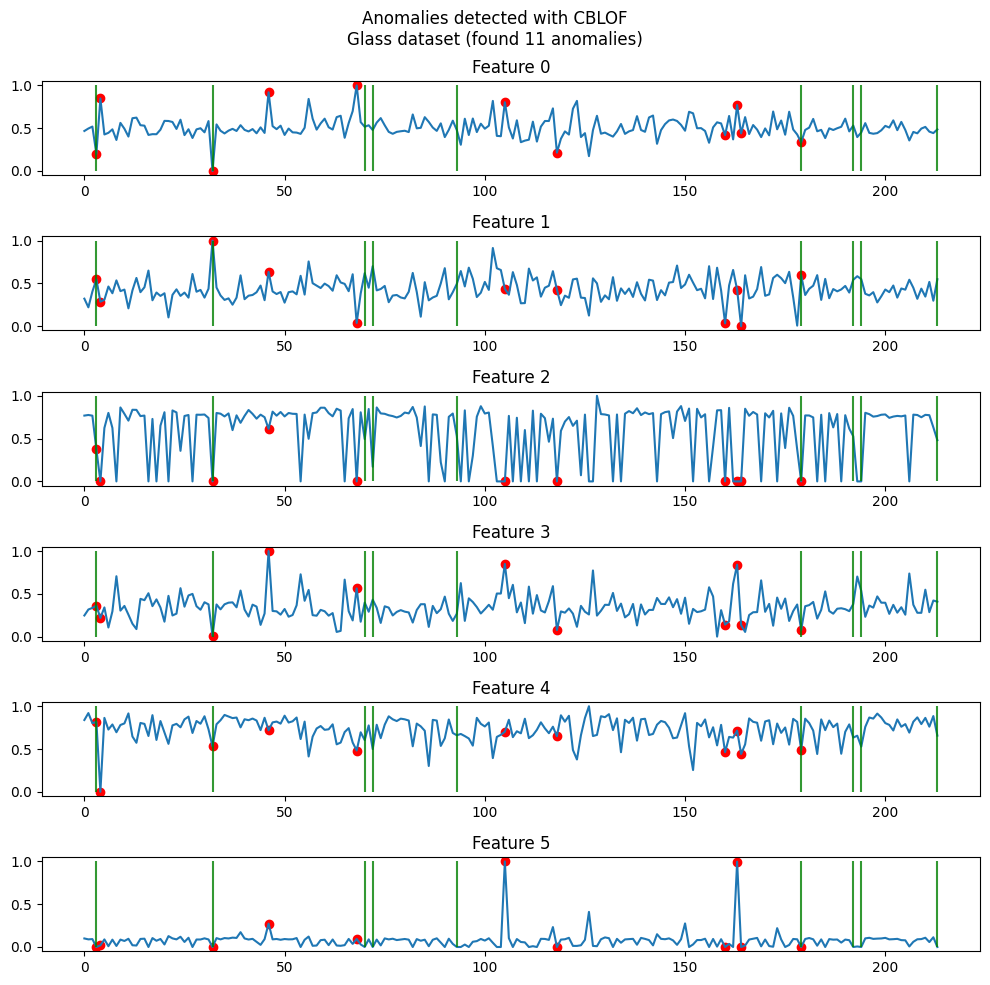

In [180]:
# Plot anomalies
fig, axs = plt.subplots(6, 1, figsize=(10, 10))

for i, ax in enumerate(axs.flatten()):
    ax.plot(gdf[f"{i}"])
    ax.set_title(f"Feature {i}")
    # add scatter plot for anomalies
    ax.scatter(
        gdf[gdf["anomaly_cblof"] == 1].index,
        gdf[gdf["anomaly_cblof"] == 1][f"{i}"],
        color="red",
    )

    ax.vlines(
        gdf[gdf["target"] == 1].index,
        gdf[f"{i}"].min(),
        gdf[f"{i}"].max(),
        color="green",
        alpha=0.8,
    )


plt.suptitle(
    f"Anomalies detected with CBLOF\nGlass dataset (found {gdf['anomaly_cblof'].sum()} anomalies)"
)
plt.tight_layout()
plt.show()

# XGBOD
Semi supervised outlier detection (supposed to be really powerful)

In [215]:
from pyod.models.xgbod import XGBOD

model = XGBOD(contamination=0.2)

In [ ]:
model.fit(gdf.drop(columns="target"), gdf["target"])

In [217]:
gdf["anomaly_xgbod"] = model.predict(gdf.drop(columns="target"))

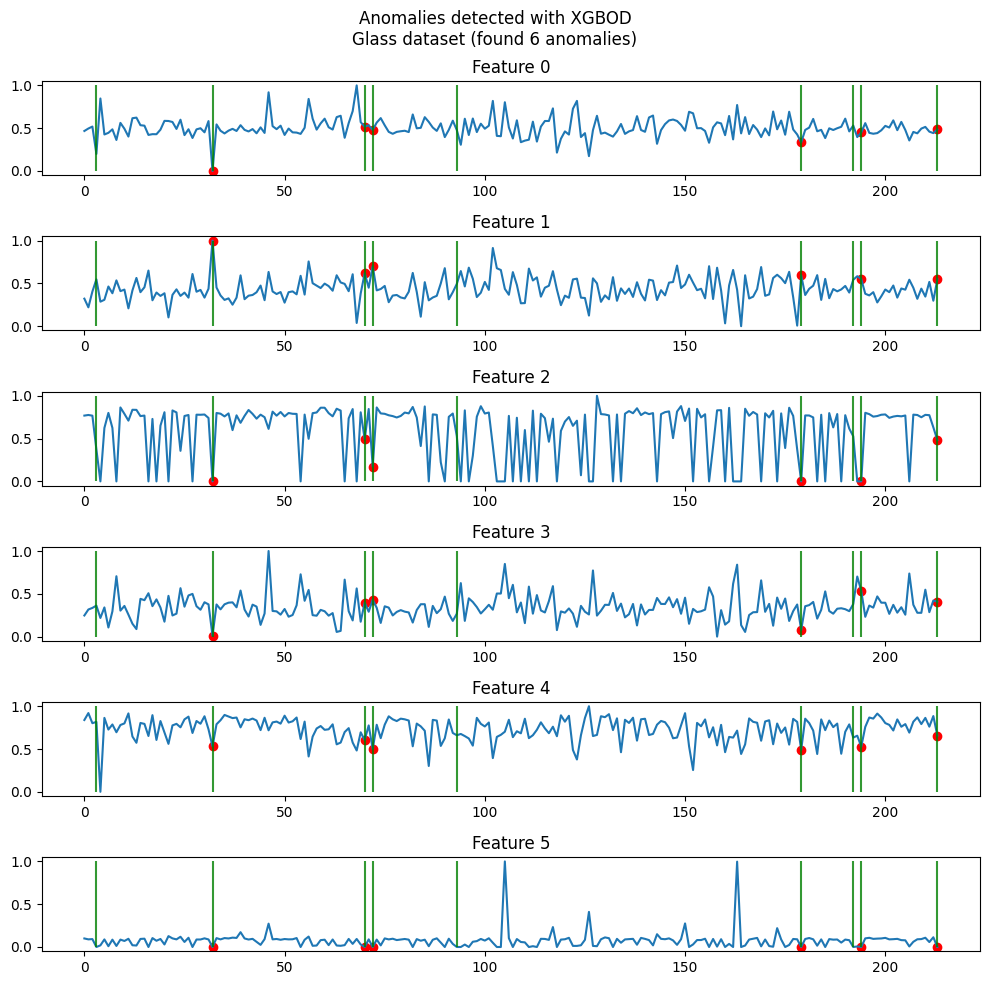

In [218]:
# Plot anomalies
fig, axs = plt.subplots(6, 1, figsize=(10, 10))

for i, ax in enumerate(axs.flatten()):
    ax.plot(gdf[f"{i}"])
    ax.set_title(f"Feature {i}")
    # add scatter plot for anomalies
    ax.scatter(
        gdf[gdf["anomaly_xgbod"] == 1].index,
        gdf[gdf["anomaly_xgbod"] == 1][f"{i}"],
        color="red",
    )

    ax.vlines(
        gdf[gdf["target"] == 1].index,
        gdf[f"{i}"].min(),
        gdf[f"{i}"].max(),
        color="green",
        alpha=0.8,
    )


plt.suptitle(
    f"Anomalies detected with XGBOD\nGlass dataset (found {gdf['anomaly_xgbod'].sum()} anomalies)"
)
plt.tight_layout()
plt.show()

Trying again xgbod but training only on the first half of the data

In [239]:
gdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   0              214 non-null    float64
 1   1              214 non-null    float64
 2   2              214 non-null    float64
 3   3              214 non-null    float64
 4   4              214 non-null    float64
 5   5              214 non-null    float64
 6   6              214 non-null    float64
 7   target         214 non-null    int32  
 8   anomaly_if     214 non-null    int64  
 9   anomaly_lof    214 non-null    int64  
 10  anomaly_cblof  214 non-null    int64  
 11  anomaly_abod   214 non-null    int64  
 12  anomaly_xgbod  214 non-null    int64  
dtypes: float64(7), int32(1), int64(5)
memory usage: 21.0 KB


In [240]:
gdf1 = gdf.loc[:100]
gdf2 = gdf.loc[100:]

gdf1.drop(columns=list(gdf1.filter(regex="anomaly")), axis=1, inplace=True)
gdf2.drop(columns=list(gdf2.filter(regex="anomaly")), axis=1, inplace=True)

/tmp/ipykernel_8618/1278245504.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf1.drop(columns=list(gdf1.filter(regex="anomaly")), axis=1, inplace=True)
/tmp/ipykernel_8618/1278245504.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf2.drop(columns=list(gdf2.filter(regex="anomaly")), axis=1, inplace=True)


In [241]:
gdf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       101 non-null    float64
 1   1       101 non-null    float64
 2   2       101 non-null    float64
 3   3       101 non-null    float64
 4   4       101 non-null    float64
 5   5       101 non-null    float64
 6   6       101 non-null    float64
 7   target  101 non-null    int32  
dtypes: float64(7), int32(1)
memory usage: 6.0 KB


In [242]:
gdf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 100 to 213
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       114 non-null    float64
 1   1       114 non-null    float64
 2   2       114 non-null    float64
 3   3       114 non-null    float64
 4   4       114 non-null    float64
 5   5       114 non-null    float64
 6   6       114 non-null    float64
 7   target  114 non-null    int32  
dtypes: float64(7), int32(1)
memory usage: 6.8 KB


In [243]:
model = XGBOD(contamination=0.05)

model.fit(gdf1.drop(columns="target", axis=1), gdf1["target"])

/storage/store/work/jyehya/anaconda/envs/benchopt/lib/python3.12/site-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


/storage/store/work/jyehya/anaconda/envs/benchopt/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [17:23:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "contamination", "silent" } are not used.

  warnings.warn(smsg, UserWarning)


XGBOD(base_score=0.5, booster='gbtree', colsample_bylevel=1,
   colsample_bytree=1,
   estimator_list=[KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=1, p=2,
  radius=1.0), LOF(algorithm='auto', contamination=0.1, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=1, n_neighbors=1, no...ax_features=1.0,
    max_samples='auto', n_estimators=200, n_jobs=1, random_state=0,
    verbose=0)],
   gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
   min_child_weight=1, n_estimators=100, n_jobs=1, nthread=None,
   objective='binary:logistic', random_state=0, reg_alpha=0, reg_lambda=1,
   scale_pos_weight=1, silent=True,
   standardization_flag_list=[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, F

In [244]:
gdf2["anomaly_xgbod"] = model.predict(gdf2.drop(columns="target", axis=1))

/tmp/ipykernel_8618/3590432202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf2["anomaly_xgbod"] = model.predict(gdf2.drop(columns="target", axis=1))


In [245]:
gdf2.head()

,0,1,2,3,4,5,6,target,anomaly_xgbod
100,0.494218,0.517355,0.792897,0.319192,0.763403,0.074997,0.215563,0,0
101,0.529048,0.423905,0.804669,0.371667,0.809473,0.101933,0.236288,0,0
102,0.818648,0.913613,0.413098,0.314006,0.393862,0.049642,0.305305,0,0
103,0.410524,0.677321,0.000000,0.503249,0.641321,0.000000,0.261706,0,0
104,0.406446,0.656251,0.000000,0.503137,0.665658,0.000000,0.250812,0,0


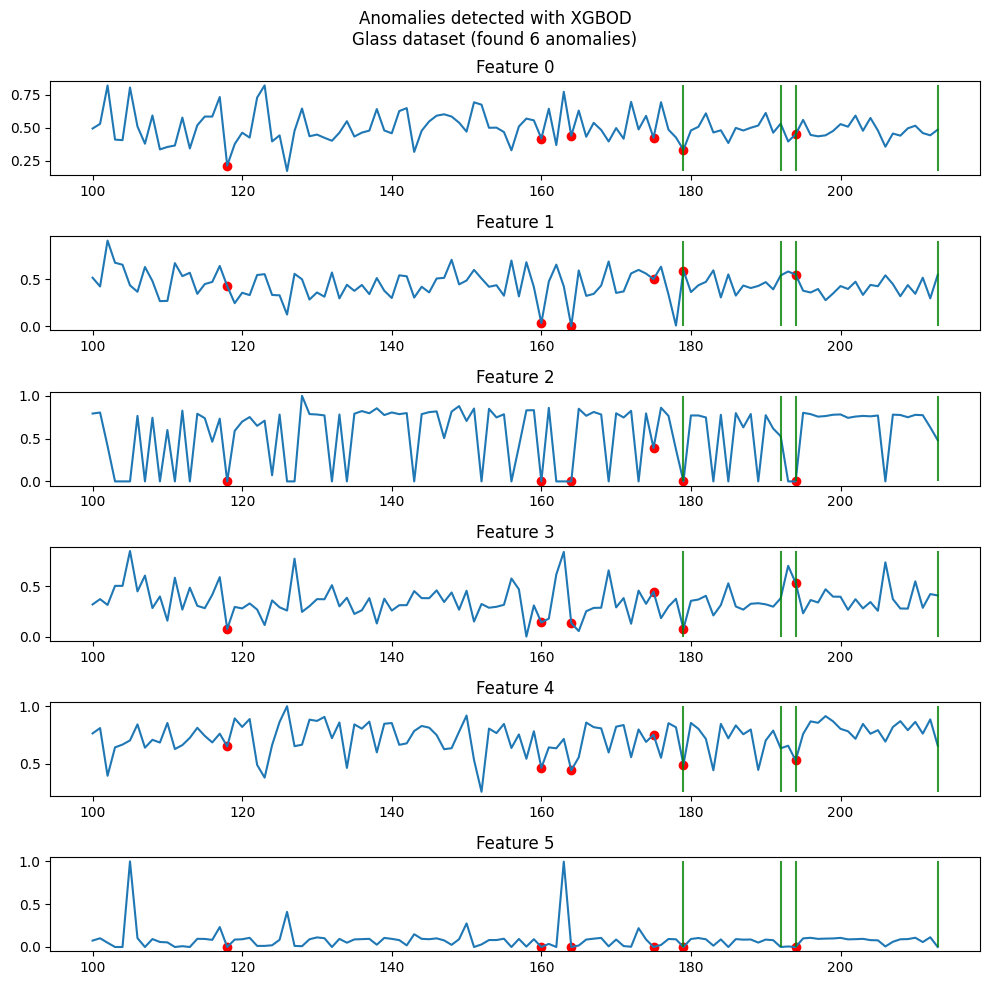

In [246]:
# Plot anomalies
fig, axs = plt.subplots(6, 1, figsize=(10, 10))

for i, ax in enumerate(axs.flatten()):
    ax.plot(gdf2[f"{i}"])
    ax.set_title(f"Feature {i}")
    # add scatter plot for anomalies
    ax.scatter(
        gdf2[gdf2["anomaly_xgbod"] == 1].index,
        gdf2[gdf2["anomaly_xgbod"] == 1][f"{i}"],
        color="red",
    )

    ax.vlines(
        gdf2[gdf2["target"] == 1].index,
        gdf2[f"{i}"].min(),
        gdf2[f"{i}"].max(),
        color="green",
        alpha=0.8,
    )


plt.suptitle(
    f"Anomalies detected with XGBOD\nGlass dataset (found {gdf2['anomaly_xgbod'].sum()} anomalies)"
)
plt.tight_layout()
plt.show()